<a href="https://colab.research.google.com/github/aa1reXo/Agentic-AI/blob/main/Ax_QLC_02_Build_a_multi_user_conversational_Tool_use_Agentic_AI_System_with_Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a ReAct AI Agent from scratch with LangGraph

This demo will cover building AI Agents with LangGraph from scratch.

Here we'll create a simple ReAct agent app that can search the web and check the weather. The app consists of an agent (LLM) and tools. As we interact with the app, we will first call the agent (LLM) to decide if we should use tools. Then we will run a loop:

- If the agent said to take an action (i.e. call tool), we'll run the tools and pass the results back to the agent
- If the agent did not ask to run tools, we will finish (respond to the user)

We will implement this in LangGraph completely from scratch step by step.


There will be three parts to this hands-on demo:

- Part I: Build a Basic Chatbot with LangGraph
- Part II: Build a simple ReAct Agent with LangGraph - LLM + Tools
- Part III: Build a multi-user conversational ReAct Agent with LangGraph

## Install OpenAI, and LangChain dependencies

In [1]:
!pip install langchain==0.3.12
#!pip install langchain-openai==0.2.12
!pip install langchain-community==0.3.12
!pip install langgraph==0.2.56
!pip install langgraph-checkpoint-sqlite==2.0.1
!pip install beautifulsoup4
!pip install langchain-google-genai==2.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.9/326.9 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.8
    Uninstalling langsmith-0.3.8:
      Successfully uninstalled langsmith-0.3.8
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.18
    Uninstalling langchain-0.3.18:
      Successfully uninstalled langchain-0.3.18
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.6 MB/s eta 0:00:00


## Enter Open AI API Key

In [2]:
from getpass import getpass

# OPENAI_KEY = getpass('Enter your OpenAI Key: ')
GEMINI_API_KEY = getpass('Enter your Google Gemini API Key: ')

Enter your Google Gemini API Key: ··········


## Enter WeatherAPI API Key

Get a free API key from [here](https://www.weatherapi.com/signup.aspx)

In [3]:
WEATHER_API_KEY = getpass('Enter WeatherAPI API Key: ')

Enter WeatherAPI API Key: ··········


## Enter Tavily Search API Key

Get a free API key from [here](https://tavily.com/#api)

In [4]:
TAVILY_API_KEY = getpass('Enter Tavily Search API Key: ')

Enter Tavily Search API Key: ··········


## Setup Environment Variables

In [5]:
import os

# os.environ['OPENAI_API_KEY'] = OPENAI_KEY
os.environ["GOOGLE_API_KEY"] = GEMINI_API_KEY
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

In [6]:
from langchain_community.utilities.tavily_search import TavilySearchAPIWrapper
from langchain_core.tools import tool
import json
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

tavily_search = TavilySearchAPIWrapper()

@tool
def search_web(query: str) -> list:
    """Search the web for a query. Userful for general information or general news"""
    results = tavily_search.raw_results(query=query,
                                        max_results=8,
                                        search_depth='advanced',
                                        include_answer=False,
                                        include_raw_content=True)
    return results

@tool
def get_weather(query: str) -> list:
    """Search weatherapi to get the current weather."""
    base_url = "http://api.weatherapi.com/v1/current.json"
    complete_url = f"{base_url}?key={WEATHER_API_KEY}&q={query}"

    response = requests.get(complete_url)
    data = response.json()
    if data.get("location"):
        return data
    else:
        return "Weather Data Not Found"

In [8]:
search_web.invoke('Latest LLMs released in 2025')

{'query': 'Latest LLMs released in 2025',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.koyeb.com/blog/best-open-source-llms-in-2025',
   'title': 'Best Open Source LLMs in 2025 - Koyeb',
   'content': 'DeepSeek-R1 Qwen 32BMistral Small 3Qwen 2.5 Coder 7B InstructBest Open Source Models for Reasoning, Code Generation, and MoreFine-Tuning and Deploying Open LLMs with Serverless GPUs Open source LLMs continue to compete with proprietary models on performance benchmarks for natural language tasks like text generation, code completion, and reasoning. In this blog post, we’ll explore the best open LLMs available at the start of 2025, including: DeepSeek-R1, Mistral Small 3, and Qwen 2.5 Coder. Qwen 2.5 7B Coder Instruct stands out for its high performance in code tasks, including generation, reasoning, and code fixing. Open-source AI models like DeepSeek-R1, Mistral Small 3, and Qwen 2.5 Coder provide powerful alternatives to proprietary opt

In [9]:
get_weather.invoke('Hyderabad')

{'location': {'name': 'Hyderabad',
  'region': 'Telangana',
  'country': 'India',
  'lat': 17.3753,
  'lon': 78.4744,
  'tz_id': 'Asia/Kolkata',
  'localtime_epoch': 1740130758,
  'localtime': '2025-02-21 15:09'},
 'current': {'last_updated_epoch': 1740130200,
  'last_updated': '2025-02-21 15:00',
  'temp_c': 33.1,
  'temp_f': 91.6,
  'is_day': 1,
  'condition': {'text': 'Partly cloudy',
   'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png',
   'code': 1003},
  'wind_mph': 7.6,
  'wind_kph': 12.2,
  'wind_degree': 348,
  'wind_dir': 'NNW',
  'pressure_mb': 1016.0,
  'pressure_in': 30.0,
  'precip_mm': 0.0,
  'precip_in': 0.0,
  'humidity': 30,
  'cloud': 50,
  'feelslike_c': 31.0,
  'feelslike_f': 87.7,
  'windchill_c': 33.8,
  'windchill_f': 92.9,
  'heatindex_c': 31.8,
  'heatindex_f': 89.2,
  'dewpoint_c': 5.9,
  'dewpoint_f': 42.6,
  'vis_km': 6.0,
  'vis_miles': 3.0,
  'uv': 3.3,
  'gust_mph': 8.7,
  'gust_kph': 14.1}}

In [10]:
from langchain_google_genai import ChatGoogleGenerativeAI

tools = [search_web, get_weather]
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm_with_tools = llm.bind_tools(tools)

In [ ]:
llm_with_tools.invoke('What is AI in 1 line')

{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


AIMessage(content='AI, or artificial intelligence, is the ability of a computer to perform tasks that normally require human intelligence.\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-5b7abb29-029e-440d-ba87-49e0853cf42c-0', usage_metadata={'input_tokens': 65, 'output_tokens': 22, 'total_tokens': 87})

In [ ]:
llm_with_tools.invoke('What are some of the latest LLMs released')

{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


AIMessage(content='', additional_kwargs={'function_call': {'name': 'search_web', 'arguments': '{"query": "latest large language models released"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-9caca380-9768-483d-a19f-9c1eedbb0d51-0', tool_calls=[{'name': 'search_web', 'args': {'query': 'latest large language models released'}, 'id': 'de89a4c8-e22a-402c-b66a-2ec4b1975228', 'type': 'tool_call'}], usage_metadata={'input_tokens': 67, 'output_tokens': 9, 'total_tokens': 76})

### Build the Agentic Graph with LangGraph built-ins - Recommended Flow

Here we will use LangGraph to build the full graph which will have the Agentic workflow.

Each functionality will be implemented as we would in the real-world.

Here we will be replacing our `BasicToolNode` for the prebuilt [ToolNode](https://langchain-ai.github.io/langgraph/reference/prebuilt/#toolnode),
and our `route_tools` condition with the prebuilt [tools_condition](https://langchain-ai.github.io/langgraph/reference/prebuilt/#tools_condition)

In [25]:
from typing import Annotated

#from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

# define function which will be used to store all agent messages
class State(TypedDict):
    messages: Annotated[list, add_messages]

# start the graph building
graph_builder = StateGraph(State)

# add tools and bind to LLM
tools = [search_web, get_weather]
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm_with_tools = llm.bind_tools(tools)

# add the LLM to graph
def chatbot(state: State):
    current_state= state['messages']
    response = llm_with_tools.invoke(current_state)
    return {"messages": [response]}

graph_builder.add_node("chatbot", chatbot)
# Define entry point to the graph
graph_builder.set_entry_point("chatbot")

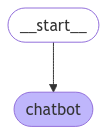

In [26]:
# compile the graph
agent = graph_builder.compile()
display(Image(agent.get_graph().draw_mermaid_png()))

In [27]:



# Add tools to a node
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)



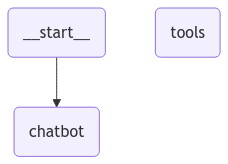

In [28]:
# compile the graph
agent = graph_builder.compile()
display(Image(agent.get_graph().draw_mermaid_png()))

In [29]:
# add conditional edges
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
    ['tools', '__end__']
)

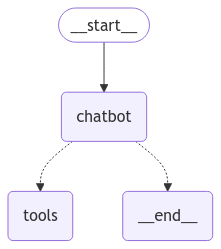

In [30]:
# compile the graph
agent = graph_builder.compile()
display(Image(agent.get_graph().draw_mermaid_png()))

In [31]:
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")

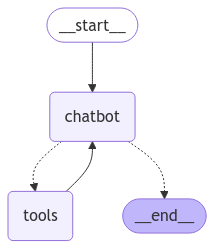

In [32]:
# compile the graph
agent = graph_builder.compile()
display(Image(agent.get_graph().draw_mermaid_png()))

In [23]:

# compile the graph
agent = graph_builder.compile()

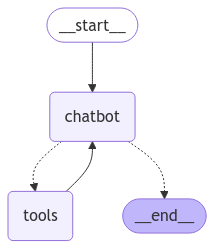

In [24]:
from IPython.display import Image, display, Markdown

display(Image(agent.get_graph().draw_mermaid_png()))

In [34]:
prompt = """What are some of the latest LLMs released?"""
response = agent.invoke({"messages": ("user", prompt)})
response

{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'search_web', 

{'messages': [HumanMessage(content='What are some of the latest LLMs released?', additional_kwargs={}, response_metadata={}, id='f9b93af9-e9d4-4274-bd0d-f0b98109892e'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'search_web', 'arguments': '{"query": "latest large language models released"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-1534e6b1-7c4d-4347-b4b8-85e61e94a83b-0', tool_calls=[{'name': 'search_web', 'args': {'query': 'latest large language models released'}, 'id': '04859d0a-76ba-49db-9670-5c6fc0cf187a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 68, 'output_tokens': 9, 'total_tokens': 77}),
  ToolMessage(content='{"query": "latest large language models released", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://explodingtopics.com/blog/list-of-llms", "title": "Best 22 Large Language Models (LLMs) (February 

In [35]:
display(Markdown(response['messages'][-1].content))

Based on my web search, here are some of the latest LLMs that have been released:

*   **DeepSeek R1:** Released in January 2025 by DeepSeek, this open-source model excels in math and coding.
*   **GPT-4o:** OpenAI's latest model, released in May 2024, offers multimodal capabilities (text, image, video, voice) and improved speed and cost-efficiency compared to GPT-4.
*   **Claude 3.5 Sonnet:** Anthropic's newest model, released in June 2024, is a strong competitor to GPT-4o, with improvements in coding, text reasoning, and vision tasks.
*   **Llama 3.1:** Meta AI's updated Llama 3 model, released in June 2024, features 405 billion parameters and an expanded context length.
*   **Nemotron-4:** Nvidia's language model, released in June 2024, is designed for synthetic data generation and AI model training.
*   **Gemma 2:** Google DeepMind's open-source language model, released in June 2024, is available in various sizes and can be run locally.

Keep in mind that the field of LLMs is constantly evolving, so new models are being released frequently.

In [36]:
prompt = """What are its key features"""
response = agent.invoke({"messages": ("user", prompt)})
display(Markdown(response['messages'][-1].content))

{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


Could you please specify what you are asking about? I can search the web for information about a topic, or I can get the current weather for a location.


In [37]:
def call_agent(agent, prompt):
    events = agent.stream(
        {"messages": [{"role": "user", "content": prompt}]},
        {"configurable": {"thread_id": "any"}},
        stream_mode="values",
    )

    for event in events:
        event["messages"][-1].pretty_print()

    print()
    print('Final Response:\n')
    display(Markdown(event["messages"][-1].content))

In [40]:
prompt = """What is the weather in bangalore?
show detailed statistics"""
call_agent(agent, prompt)

================================ Human Message =================================

What is the weather in bangalore?
show detailed statistics
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'requi

The weather in Bangalore, India is sunny with a temperature of 32.3 degrees Celsius (90.1 degrees Fahrenheit). The humidity is 28% and the wind is blowing from the East at 17.3 km/h (10.7 mph). The feels like temperature is 30.1 degrees Celsius (86.2 degrees Fahrenheit). The UV index is 3.8.

In [41]:
prompt = """What is the weather in hyderabad?
show detailed statistics"""
call_agent(agent, prompt)

================================ Human Message =================================

What is the weather in hyderabad?
show detailed statistics
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'requi

OK. The weather in Hyderabad, India is partly cloudy. The temperature is 33.1 degrees Celsius, which feels like 31 degrees Celsius. The humidity is 30%. The wind is coming from the NNW at 12.2 kph. The UV index is 3.3.

In [42]:
prompt = """Which city is hotter among the above?"""
call_agent(agent, prompt)

================================ Human Message =================================

Which city is hotter among the above?
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required

Could you please provide the cities you're asking about?


We have successfully built an AI Agent which can search the web, get weather for us but it is not yet conversational. We will add in the that functionality in Part III next.

## Build a multi-user conversational ReAct Agent with LangGraph

Now, we will build a multi-user conversational ReAct agent with LangGraph which will use the web search or weather tool based on our input prompts to get relevant data which the LLM might not know by default and give relevant responses

Our agentic chatbot from Part II can use tools to answer user questions, but it doesn't remember the context of previous interactions. This limits its ability to have coherent, multi-turn conversations.

LangGraph solves this problem through **persistent checkpointing**. If you provide a `checkpointer` when compiling the graph and a `thread_id` when calling your graph, LangGraph automatically saves the state after each step. When you invoke the graph again using the same `thread_id`, the graph loads its saved state, allowing the chatbot to pick up where it left off.

**checkpointing** is _much_ more powerful than simple chat memory - it lets you save and resume complex state at any time for error recovery, human-in-the-loop workflows, time travel interactions, and more

While the legacy syntax uses `session_id`, in LangGraph, each user session is identified by `thread_id`

We will use `SqliteSaver` which helps to store separate conversation histories per user or session.

This will help us build a conversational Agentic Chatbot which will be accessed by many users at the same time.



In [43]:
# removes the memory database file - usually not needed
# you can run this only when you want to remove ALL conversation histories
# ok if you get rm: cannot remove 'memory.db': No such file or directory  because initially no memory exists
!rm memory.db*

rm: cannot remove 'memory.db*': No such file or directory


In [44]:
from langgraph.checkpoint.sqlite import SqliteSaver

def chat_with_agent(agent_graph, prompt, session_id, verbose=False):
    with SqliteSaver.from_conn_string("memory.db") as memory:
        agent = agent_graph.compile(checkpointer=memory)
        events = agent.stream(
            {"messages": [{"role": "user", "content": prompt}]},
            {"configurable": {"thread_id": session_id}},
            stream_mode="values",
        )

        print('Running Agent, please wait...')
        for event in events:
            if verbose:
                event["messages"][-1].pretty_print()

    display(Markdown(event["messages"][-1].content))

In [45]:
graph_builder

Let's now simulate User 1 using the agent

In [46]:
user_id = 'jack001'
prompt = "Tell me about recent LLMs released"
chat_with_agent(graph_builder, prompt, user_id, verbose=True)

Running Agent, please wait...
================================ Human Message =================================

Tell me about recent LLMs released
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 

I have found some information about recent LLMs. Some of the latest models include:

*   **GPT-4o:** OpenAI's newest model, released in May 2024, is multimodal, integrating text, image, video, and voice capabilities.
*   **Claude 3.5 Sonnet:** Anthropic's model, released in June 2024, is known for ethical design and strong performance.
*   **Grok-1:** xAI's model, released in November 2023, focuses on generating responses with personality and real-time data from X (formerly Twitter). Grok-2 and Grok-2 mini were released in August 2024.
*   **Gemini 1.5:** Google's model improves multilingual capabilities and translation accuracy.
*   **Inflection-2.5:** Inflection AI’s model powers the Pi conversational AI assistant.
*   **Llama 3.1:** Meta’s open-source LLM with improved reasoning and coding abilities.
*   **Mistral 7B:** A smaller, efficient model that outperforms larger models in many benchmarks.
*   **Falcon 180B:** A large open-source LLM excelling in translation and text generation.
*   **Nemotron-4:** Nvidia's family of large language models for synthetic data generation and AI model training.



In [47]:
prompt = "What about reasoning LLMs?"
chat_with_agent(graph_builder, prompt, user_id, verbose=True)

Running Agent, please wait...
================================ Human Message =================================

What about reasoning LLMs?
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'require

Based on my search, here are some reasoning LLMs that have been released:

*   **DeepSeek-R1:** This open-source reasoning model excels in complex reasoning, mathematical problem-solving, and logical inference. It uses reinforcement learning techniques to refine its reasoning ability and solve complex problems through self-verification, chain-of-thought reasoning, and reflection.
*   **OpenAI o1 and o3:** The o1 model family focuses on providing reasoning models. The o1 models excel in STEM fields, with strong results in mathematical reasoning, code generation, and scientific research tasks. The o3 model is designed to handle tasks with more analytical thinking, problem-solving, and complex reasoning.
*   **Tülu 3:** Allen Institute for AI's Tülu 3 is an open-source 405 billion-parameter LLM that uses a "reinforcement learning from verifiable rewards" framework for fine-tuning tasks with verifiable outcomes, such as solving mathematical problems and following instructions.


In [48]:
prompt = "What are the four major design patterns for creating agentic ai systems?"
chat_with_agent(graph_builder, prompt, user_id, verbose=False)

Running Agent, please wait...
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items':

Okay, based on the search results, here are four key design patterns for creating agentic AI systems:

1.  **Reflection Pattern:** This pattern focuses on self-evaluation and iterative improvement. The AI agent reviews its outputs, identifies flaws, and refines its response, repeating the process until the output is polished.

2.  **Tool Use Pattern:** This pattern empowers agents to interact with external resources like APIs, databases, or programming environments to perform actions beyond their internal knowledge base.

3.  **Planning Pattern:** This pattern enables agents to break down complex tasks into sub-tasks, create a roadmap for execution, and adapt dynamically based on new information.

4.  **Multi-Agent Pattern:** This pattern involves multiple agents working together to achieve a common goal. Each agent has a specific role, and they communicate to ensure seamless task execution.


Let's now simulate User 2 using the agent

In [49]:
user_id = 'bond007'
prompt = "how is the weather in Hyderabad today? Show detailed statistics"
chat_with_agent(graph_builder, prompt, user_id, verbose=False)

Running Agent, please wait...
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items':

The weather in Hyderabad, India is partly cloudy with a temperature of 33.1 degrees Celsius (91.6 degrees Fahrenheit). It feels like 31 degrees Celsius (87.7 degrees Fahrenheit). The humidity is 30%. The wind is coming from the NNW at 12.2 kph (7.6 mph). The pressure is 1016 mb. The UV index is 3.3.


In [50]:
user_id = 'bond007'
prompt = "what about Dubai?"
chat_with_agent(graph_builder, prompt, user_id, verbose=False)

Running Agent, please wait...
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items':

The weather in Dubai, United Arab Emirates is sunny with a temperature of 31.2 degrees Celsius (88.2 degrees Fahrenheit). It feels like 32.6 degrees Celsius (90.8 degrees Fahrenheit). The humidity is 26%. The wind is coming from the NW at 19.1 kph (11.9 mph). The pressure is 1013 mb. The UV index is 6.5.

In [51]:
user_id = 'bond007'
prompt = "which city is hotter?"
chat_with_agent(graph_builder, prompt, user_id, verbose=True)

Running Agent, please wait...
================================ Human Message =================================

which city is hotter?
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': [

Dubai feels like 32.6 degrees Celsius, while Hyderabad feels like 31 degrees Celsius. So, Dubai feels hotter.


In [52]:
user_id = 'jack001'
prompt = "what are the top frameworks to build such systems?"
chat_with_agent(graph_builder, prompt, user_id, verbose=False)

Running Agent, please wait...
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items':

Based on the search results, here are some of the top frameworks for building agentic AI systems:

*   **LangChain:** A versatile framework designed to integrate LLMs with external tools for intelligent automation. It supports multiple LLMs and offers features like memory management, context handling, and prompt engineering.
*   **LangGraph:** Builds on LangChain, introducing stateful, multi-agent AI applications with a graph-based environment. It excels in complex, interactive systems with planning and reflection capabilities.
*   **CrewAI:** Simplifies the orchestration of autonomous agents by creating role-based AI teams. It focuses on collaborative AI systems with task delegation and hierarchical team structures.
*   **Microsoft AutoGen:** An open-source framework for building multi-agent AI applications, emphasizing automation and conversation handling. It provides tools for multi-agent coordination, error handling, and task optimization.
*   **Semantic Kernel:** Designed to integrate AI models into enterprise applications with a focus on security and compliance. It supports multiple languages and offers tools for managing complex tasks.
*   **Botpress:** A complete framework for building autonomous agents with a modular design, seamless integrations, and AI-driven capabilities.
